# Word2Vec Introduction
In this Notebook we will introduce the Word2Vec Algorithm and train our own model using a public dataset of tweets.
Throughout this lesson we will be using the following libraries:
1. pandas: https://pandas.pydata.org/pandas-docs/stable/
2. numpy: https://docs.scipy.org/doc/numpy-1.14.0/index.html
3. nltk: https://www.nltk.org/
4. gensim: https://radimrehurek.com/gensim/

In [1]:
import pandas as pd
import numpy as np
import gensim as gen

from matplotlib import pyplot as plt

from nltk.tokenize import RegexpTokenizer

## Google News Word2Vec
Let's get to know gensim. To do so, we will load a pretrained model trained on Google News Corpus. These are publicly available vectors for unigrams, bigrams and trigrams trained on the english language. Download the corpus from: https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/

In [2]:
model = gen.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz',binary=True)

Notice we've loaded a **KeyedVectors** object to the variable **model**. The KeyedVectors object for mapping between words and vectors of the Word2Vec model. It is used to perform operations on the vectors such as vector lookup, distance, similarity etc.
1. Check if the word **"check"** is in the vocabulary (Look at the properties of **model** and find how to access the vocabulary)
2. How many words (including bigrams and trigrams) are available in the vocabulary of this model?
3. What is the shape of each vector?

In [3]:
word_vectors = model.wv

/Users/Yohan/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [4]:
vocab = word_vectors.vocab

In [5]:
'check' in vocab

True

In [6]:
word_vectors['check'].shape

(300,)

Find the 20 most similar words to a **WORD** of your choice, check the gensim documentation for the correct function to use

In [7]:
WORD = 'hello'
model.most_similar(WORD,topn = 20)

[('hi', 0.6548984050750732),
 ('goodbye', 0.639905571937561),
 ('howdy', 0.6310957074165344),
 ('goodnight', 0.5920578241348267),
 ('greeting', 0.5855877995491028),
 ('Hello', 0.5842196941375732),
 ("g'day", 0.5754078030586243),
 ('See_ya', 0.5688872337341309),
 ('ya_doin', 0.5643120408058167),
 ('greet', 0.5636603832244873),
 ('hullo', 0.5621640086174011),
 ('hellos', 0.5596432685852051),
 ('Hey', 0.5594545602798462),
 ('bye_bye', 0.5593388676643372),
 ('bonjour', 0.5587834715843201),
 ('adios', 0.5560759902000427),
 ('ciao', 0.5548771619796753),
 ('hug', 0.5544619560241699),
 ('buh_bye', 0.5511860847473145),
 ("G'day", 0.5494420528411865)]

Compute the famous **KING - WOMEN + MEN = ?** equation, see if you can find similar relationships.

In [8]:
model.most_similar(positive = ['king', 'women'], negative = ['men'], topn = 3)

[('queen', 0.6525817513465881),
 ('monarch', 0.5959681868553162),
 ('crown_prince', 0.532433807849884)]

Try out the following function

In [9]:
model.wv.doesnt_match("breakfast cereal dinner lunch".split())

/Users/Yohan/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/Users/Yohan/Desktop/anaconda3/lib/python3.7/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'cereal'

A great method for visualizing higher dimensions is T-SNE (t-Distributed Stochastic Neighbor Embedding), the following block allows you visualize the relationships between the words king, queen, men and women using TSNE. Note that **king** and **men** are positioned in similar vector as **queen** and **women**. Keep in mind that embedding a 300 dimensional space in 2 dimensions will usually result in loss of information.

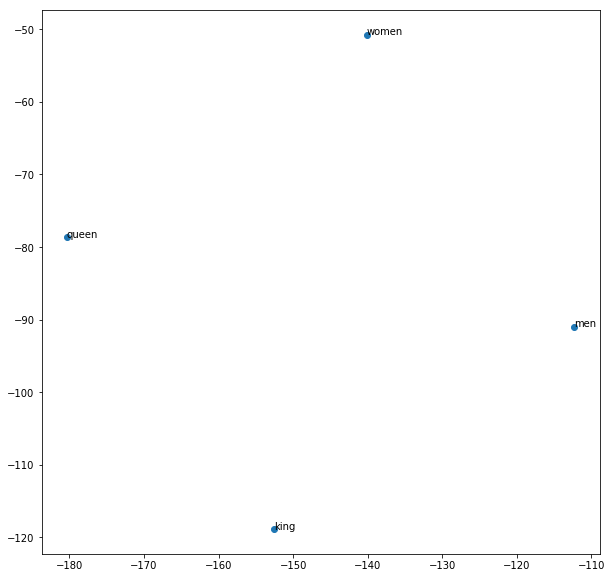

In [10]:
from sklearn.manifold import TSNE
labels = ['king','queen', 'women', 'men'] #you can add/change as many words as you like
X = np.stack([model[word] for word in labels]) 
tsne = TSNE(n_components=2, random_state=12)
X_2d = tsne.fit_transform(X)
x = [x[0] for x in X_2d]
y = [x[1] for x in X_2d]
plt.figure(figsize=(10,10))
plt.scatter(x, y)
ax = plt.gca()
for i,label in enumerate(labels):
    ax.annotate(label, (x[i],y[i]))
plt.show()

## Create your own language model using tweets
In this section we will create our own vectors using a tweets dataset

Load the **sentiment140.csv** using pandas **read_csv** function. Please use the following function parameters:
1. encoding='latin1'
2. names=['id','date','flag','user','text']

In [16]:
tweeter_df = pd.read_csv('sentiment140.csv', encoding='latin1', names=['id','date','flag','user','text'])
tweeter_df.head()

,id,date,flag,user,text
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In this exercise we will use the nltk.RegexpTokenizer - https://www.nltk.org/_modules/nltk/tokenize/regexp.html -
but you may chose any tokenizer you deem appropriate

In [17]:
tkr = RegexpTokenizer('[a-zA-Z0-9\'@]+')

Create a class called SentenceGenerator that receives as input the pandas.Series column containing the sentences to train on and a tokenizer to break the sentences. We remind you to think of any "normalizing" methods for the text used. 

In [19]:
class SentenceGenerator(object):
    def __init__(self, series, tokenizer=None):
        self.sentences = series
        self.tokenizer = tokenizer
        
    def __iter__(self):
        for tweet in self.sentences:
            yield self.tokenizer.tokenize(tweet) # yields a tweet split into a list of words (tokens) i.e. 
                                          # "I love dogs" --> ['I', 'love', 'dogs'] 
                                          # (hint: use the tokenizer to achieve this result)

Initiate a SentenceGenerator object to pass to the model

In [28]:
sentences = SentenceGenerator(tweeter_df.text, tkr)

In [29]:
len(sentences.sentences)

1600000

### Model intiation

In [30]:
model = gen.models.Word2Vec(iter=5, size=100, window=5)

Now we have initiated the Word2Vec model. The next step is to call the **build_vocab** method for the preliminary scan of the text. Call the method and print how many words are in the vocabulary of our text

In [31]:
model.build_vocab(sentences)
print("Number of words in vocabulary: {}".format(len(model.wv.vocab)))

Number of words in vocabulary: 100771


In the previous step we created the vocabulary for our model, it is now time to train! Don't forget to add the following parameters:
1. total_examples=model.corpus_count 
2. epochs=model.epochs

In [32]:
model.train(sentences, total_examples=model.corpus_count , epochs=model.epochs)

(84794821, 107891310)

Test a few words

In [34]:
WORD = 'hello'
model.most_similar(WORD,topn = 10)

/Users/Yohan/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('hi', 0.8332379460334778),
 ('Hello', 0.7451553344726562),
 ('HI', 0.5975638031959534),
 ('Hi', 0.597272515296936),
 ('goodmorning', 0.575630784034729),
 ("g'day", 0.5733354091644287),
 ('goodbye', 0.5568711161613464),
 ('Needless', 0.5473582148551941),
 ('howdy', 0.5304937362670898),
 ('hey', 0.5157997012138367)]

In [35]:
WORD = 'fire'
model.most_similar(WORD,topn = 10)

/Users/Yohan/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('roof', 0.7398131489753723),
 ('ground', 0.7277926206588745),
 ('bench', 0.7055509090423584),
 ('lights', 0.6815931797027588),
 ('sidewalk', 0.6792067289352417),
 ('concrete', 0.6496330499649048),
 ('patio', 0.6444999575614929),
 ('air', 0.641000509262085),
 ('freeway', 0.637859582901001),
 ('trampoline', 0.634464681148529)]

Try computing again the **KING - MEN + WOMEN** equation, are you satisfied with the results?

In [37]:
model.most_similar(positive = ['king', 'women'], negative = ['men'], topn = 10)

/Users/Yohan/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('queen', 0.5146985054016113),
 ('mickey', 0.5092897415161133),
 ('g', 0.4950292706489563),
 ('lion', 0.49368131160736084),
 ('infront', 0.48976653814315796),
 ('mist', 0.48532313108444214),
 ('leader', 0.48473483324050903),
 ('chef', 0.4846067428588867),
 ('farmer', 0.4795418977737427),
 ('bar', 0.4710320234298706)]

No I am not satisfied with the result since after queen none of the words have any sort of relation to royalty or gender.

Guess why this might be happening? Can you think of other words that will achieve better results? Can you explain why?

This is happening because the new corpus is much smaller than google's and because it is based on sentiment text rather than relevant text to royalty or gender. 

In [38]:
model.most_similar(positive = ['happy', 'depressed'], negative = ['sad'], topn = 10)

/Users/Yohan/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('giddy', 0.6570305824279785),
 ('grumpy', 0.6481046676635742),
 ('satisfied', 0.644702672958374),
 ('hungover', 0.6386511325836182),
 ('confident', 0.6292369961738586),
 ('stressed', 0.6277319192886353),
 ('cranky', 0.6238649487495422),
 ('frustrated', 0.6226609945297241),
 ('tierd', 0.6158076524734497),
 ('sleepy', 0.6125938892364502)]

In [39]:
model.most_similar(positive = ['brave', 'confident'], negative = ['scared'], topn = 10)

/Users/Yohan/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('optimistic', 0.7103308439254761),
 ('generous', 0.7017766237258911),
 ('powerful', 0.6929188966751099),
 ('helpful', 0.6906144022941589),
 ('fortunate', 0.685020923614502),
 ('enjoyable', 0.663174033164978),
 ('overwhelming', 0.6601001024246216),
 ('creative', 0.6435046195983887),
 ('thoughtful', 0.6385968923568726),
 ('entertaining', 0.6378906965255737)]

We can see that the above results are much better because the examples are sentiment related as was the text we trained on.

Play around with the model see if you can find some insights to share with the class

In [44]:
WORD = 'guy'
model.most_similar(WORD,topn = 10)

/Users/Yohan/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('kid', 0.7823323607444763),
 ('woman', 0.7578195333480835),
 ('boy', 0.7285141944885254),
 ('person', 0.697873592376709),
 ('girl', 0.6975091099739075),
 ('lady', 0.6900158524513245),
 ('man', 0.6834324598312378),
 ('bloke', 0.6734912395477295),
 ('chick', 0.6684327721595764),
 ('bird', 0.624645471572876)]

In [45]:
WORD = 'hi'
model.most_similar(WORD,topn = 10)

/Users/Yohan/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('hello', 0.8332380056381226),
 ('HI', 0.69446861743927),
 ('Hi', 0.6550207138061523),
 ('hey', 0.6525684595108032),
 ('Needless', 0.6040825247764587),
 ('hii', 0.5848022103309631),
 ('Hello', 0.578462541103363),
 ('heyyy', 0.5755428075790405),
 ('heyy', 0.5686952471733093),
 ("g'day", 0.5639710426330566)]

We can see from the above similar words that many of them contain slang. This is because the model is trained on tweets which contain a lot of slang usually.